In [ ]:
!uv sync

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_parquet('../data/matchup/matchup_station_modis_lst.parquet')

In [4]:
df.shape

(6424, 30)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.head()

,station_name,datetime,latitude,longitude,temperature,dew_point_temperature,station_level_pressure,precipitation,wind_direction,wind_speed,wind_gust,temperature_quality_code,dew_point_temperature_quality_code,station_level_pressure_quality_code,wind_direction_quality_code,wind_speed_quality_code,wind_gust_quality_code,modis_LST,modis_time,temperature_tm1,dew_point_temperature_tm1,station_level_pressure_tm1,precipitation_tm1,wind_direction_tm1,wind_speed_tm1,wind_gust_tm1,temperature_quality_code_tm1,dew_point_temperature_quality_code_tm1,station_level_pressure_quality_code_tm1,wind_direction_quality_code_tm1,wind_speed_quality_code_tm1,wind_gust_quality_code_tm1
0,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-17 09:00:00,-33.6,18.483,28.0,18.0,997.5,0.0,160.0,9.8,0.0,1,1,1,1,1.0,0.0,310.64,2020-01-17 10:00:00,24.9,17.2,997.5,0.0,150.0,5.7,0.0,1,1,1,1,1.0,0.0
1,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-21 09:00:00,-33.6,18.483,24.7,14.6,999.3,0.0,210.0,3.6,0.0,1,1,1,1,1.0,0.0,311.90,2020-01-21 10:00:00,22.9,15.1,998.7,0.0,70.0,3.6,0.0,1,1,1,1,1.0,0.0
2,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-23 09:00:00,-33.6,18.483,28.2,10.2,997.6,0.0,90.0,5.1,0.0,1,1,1,1,1.0,0.0,312.12,2020-01-23 10:00:00,23.1,10.3,997.7,0.0,100.0,6.7,0.0,1,1,1,1,1.0,0.0
3,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-28 09:00:00,-33.6,18.483,22.5,13.7,1003.5,0.0,210.0,4.6,0.0,1,1,1,1,1.0,0.0,310.14,2020-01-28 10:00:00,18.6,12.8,1003.7,0.0,180.0,2.6,0.0,1,1,1,1,1.0,0.0
4,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-30 09:00:00,-33.6,18.483,33.4,10.4,998.3,0.0,70.0,1.5,0.0,2,1,1,1,1.0,0.0,317.80,2020-01-30 10:00:00,21.1,11.2,998.9,0.0,160.0,2.6,0.0,1,1,1,1,1.0,0.0


In [7]:
# number of stations :
df['station_name'].nunique()

15

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   station_name                             6424 non-null   object        
 1   datetime                                 6424 non-null   datetime64[ns]
 2   latitude                                 6424 non-null   float64       
 3   longitude                                6424 non-null   float64       
 4   temperature                              6424 non-null   float64       
 5   dew_point_temperature                    6424 non-null   float64       
 6   station_level_pressure                   6424 non-null   float64       
 7   precipitation                            6424 non-null   float64       
 8   wind_direction                           6424 non-null   float64       
 9   wind_speed                               

#### Data Cleaning :

In [9]:
for i in [col_name for col_name in df.columns if 'code' in col_name ]:
    print(f"unique values in {i} : {df[i].unique()}\n")

unique values in temperature_quality_code : <StringArray>
['1', '2', '1.0', '2.0', '0', 'oE']
Length: 6, dtype: string

unique values in dew_point_temperature_quality_code : <StringArray>
['1', '1.0', '2.0', '0', '2', 'dCN', 'N', 'o']
Length: 8, dtype: string

unique values in station_level_pressure_quality_code : <StringArray>
['1', 'N', 'E', 'NE', 'H', 'o']
Length: 6, dtype: string

unique values in wind_direction_quality_code : <StringArray>
['1', '0', 'K', 'w', '9', '1.0', '9.0']
Length: 7, dtype: string

unique values in wind_speed_quality_code : <StringArray>
['1.0', '0.0', '1', '0', 'K', 'oE']
Length: 6, dtype: string

unique values in wind_gust_quality_code : <StringArray>
['0.0', '1.0']
Length: 2, dtype: string

unique values in temperature_quality_code_tm1 : <StringArray>
['1', '2', '2.0', '1.0', '0', 'oE']
Length: 6, dtype: string

unique values in dew_point_temperature_quality_code_tm1 : <StringArray>
['1', '1.0', '0', 'N', 'dCN', 'd', 'o']
Length: 7, dtype: string

unique 

In [10]:
cols_interest = [col_name for col_name in df.columns if 'code' not in col_name ]

In [11]:
df = df[cols_interest]

In [12]:
df['station_name'].unique()

array(['ATLANTIS INDUSTRIAL CAPE TOWN', 'CAPE TOWN / KIRSTENBOSCH',
       'CT-AWS', 'GEELBEK', 'JONKERSHOEK', 'LANGGEWENS', 'MALMESBURY',
       'MOLTENO RESERVIOR', 'PAARL', 'ROBBEN ISLAND',
       'SOUTH AFRICAN ASTRONOMICAL OBS', 'WELLINGTON', 'WORCESTER',
       'YSTERPLAAT', 'YSTERPLANT(SAAFB)'], dtype=object)

In [13]:
data = df.copy()
data = data.drop(['datetime', 'latitude', 'longitude', 'modis_time'], axis=1)

<Axes: >

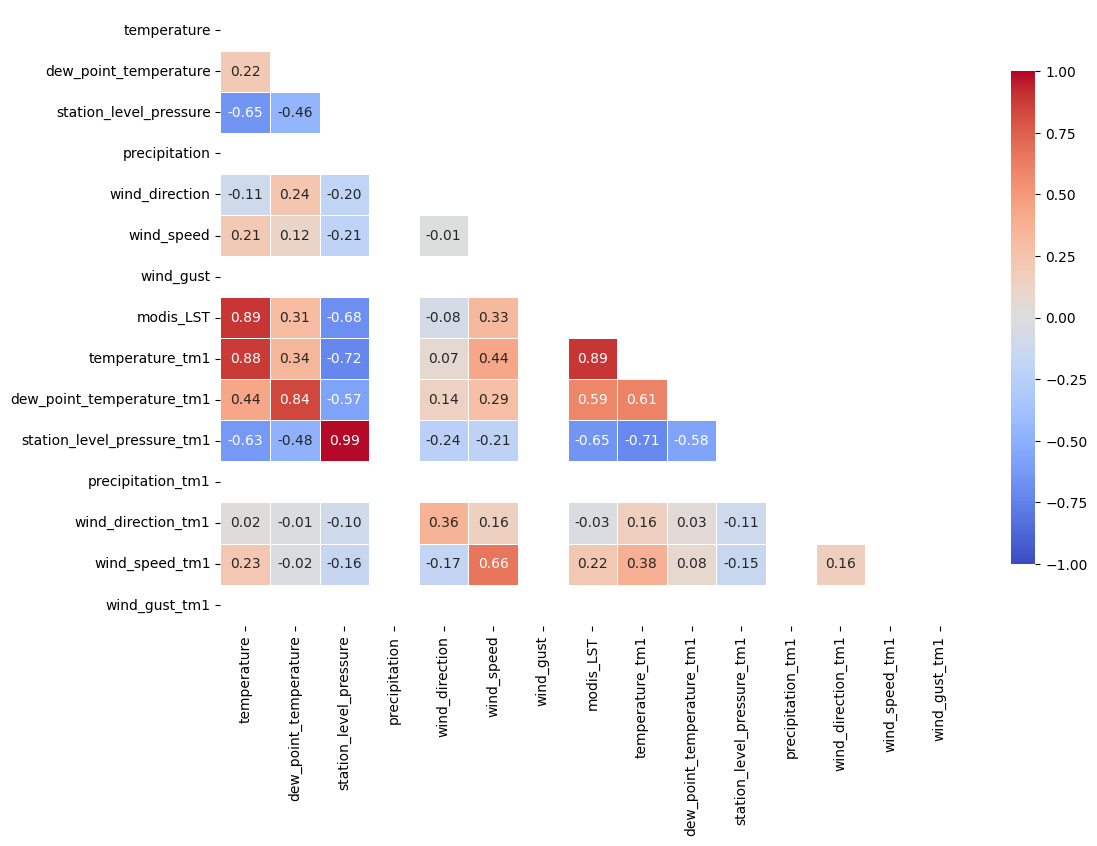

In [14]:
plt.figure(figsize=(12, 8))

corr_matrix = data[data['station_name'] == 'ATLANTIS INDUSTRIAL CAPE TOWN'].iloc[:, 1:].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,               # Apply the mask to hide upper triangle
            annot=True,              # Show the correlation values
            cmap='coolwarm',         # Color map (optional)
            vmin=-1, vmax=1,         # Set limits for correlation values
            fmt='.2f',               # Format for annotation (2 decimal places)
            linewidths=0.5,          # Width of lines between cells
            cbar_kws={"shrink": .8}) # Adjust colorbar size

In [15]:
check = data[data['station_name'] == 'ATLANTIS INDUSTRIAL CAPE TOWN'].iloc[:, 1:]

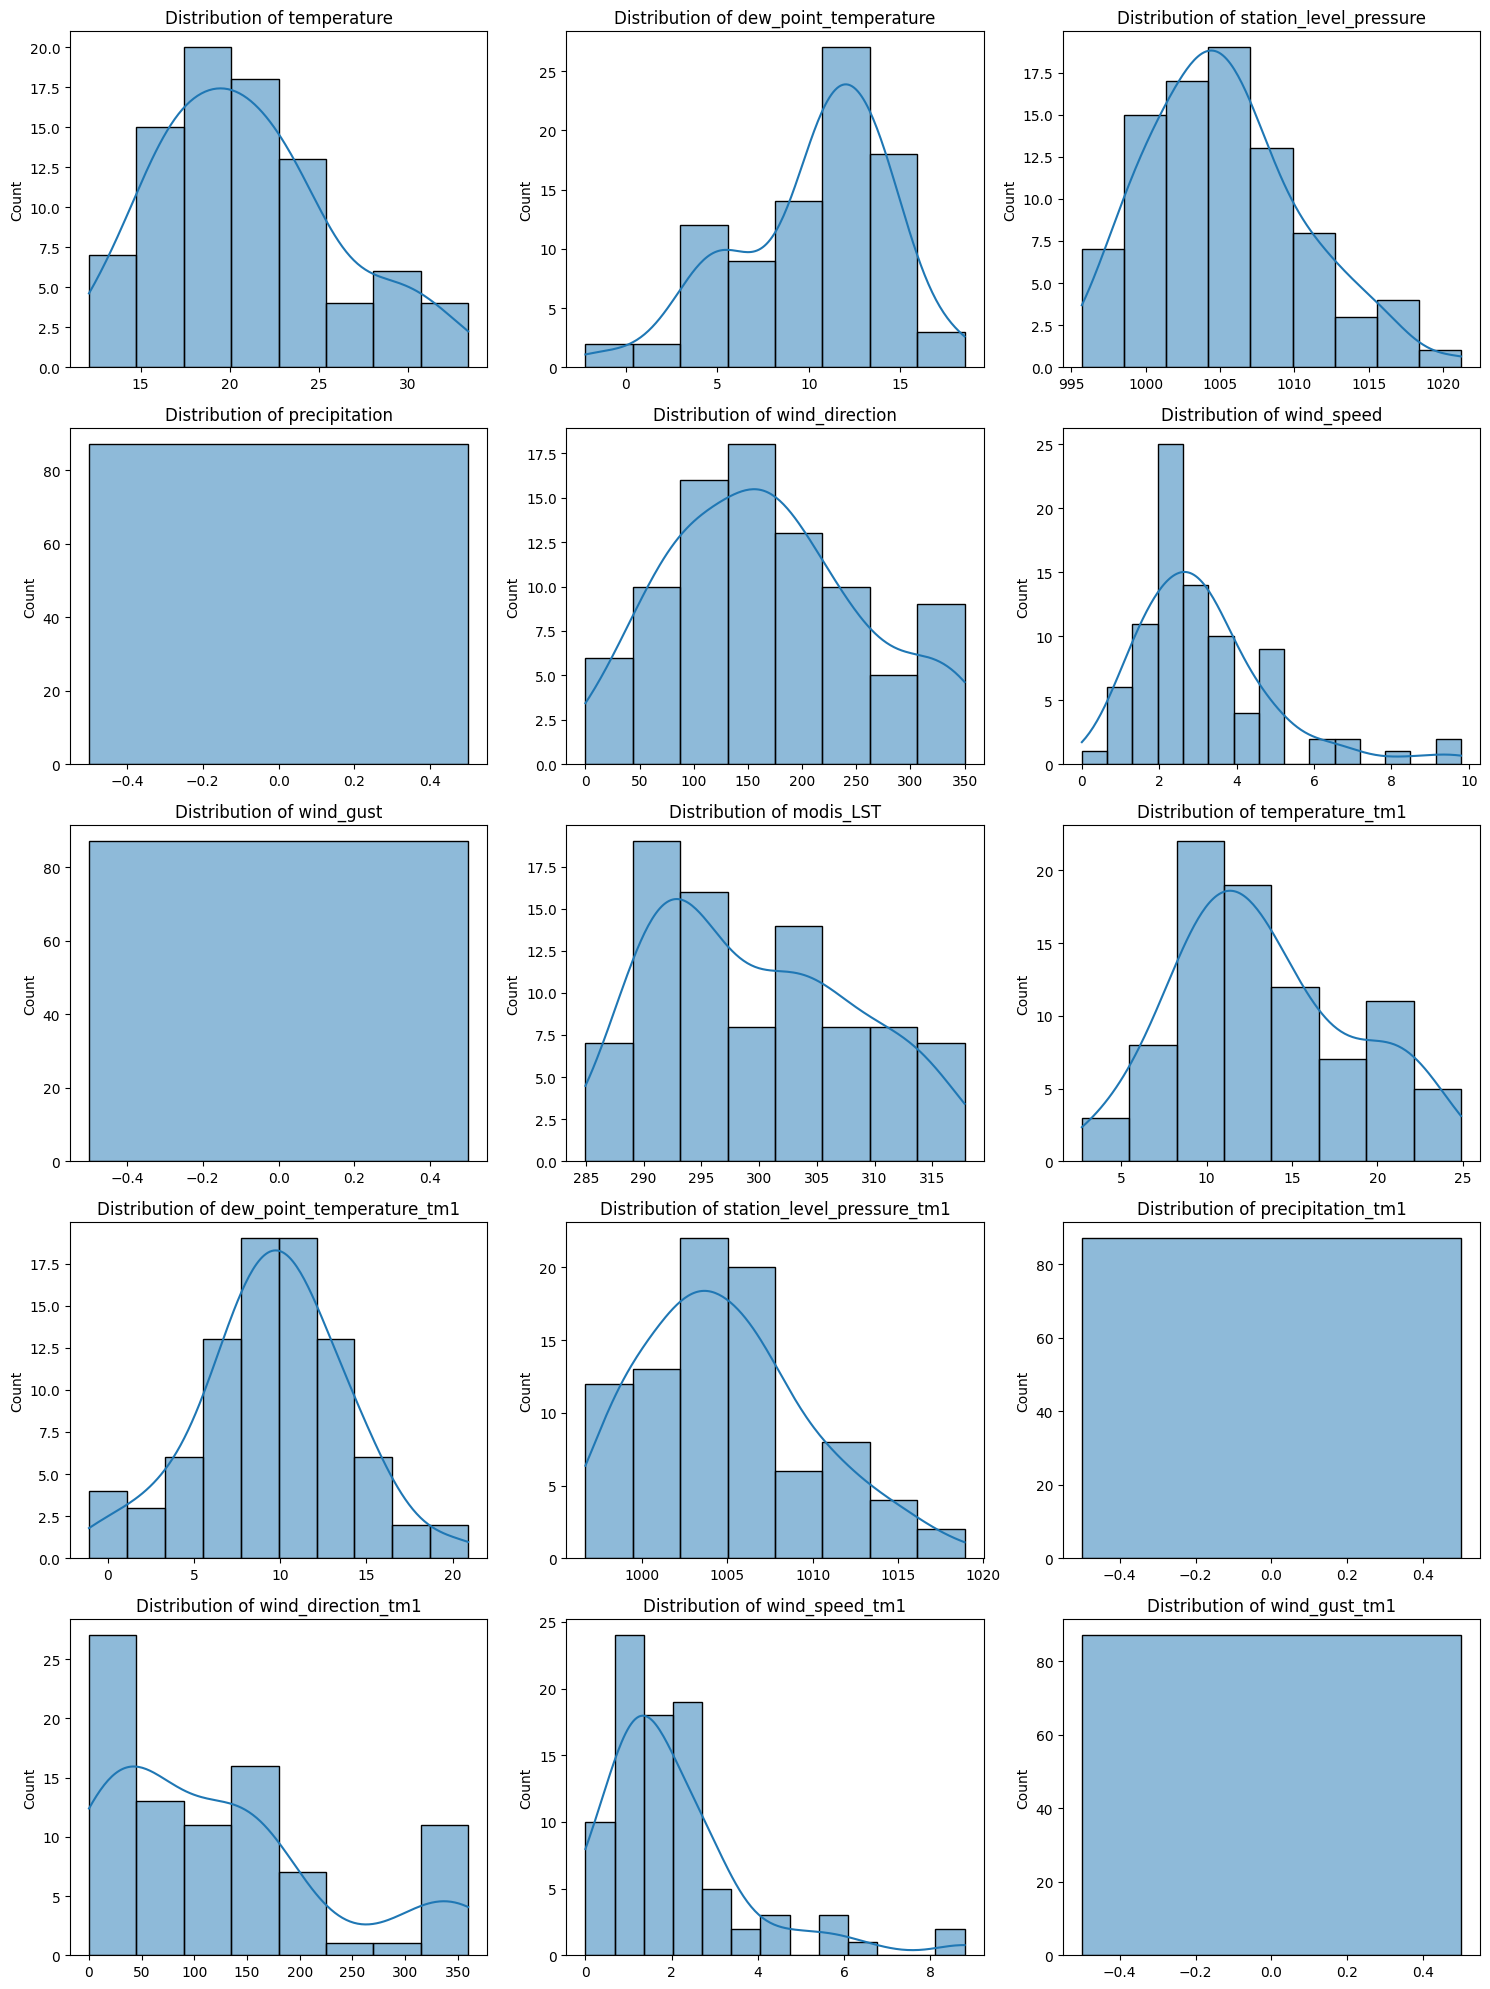

In [16]:
# Creating subplots
n_cols = len(check.columns)
n_rows = (n_cols + 2) // 3  

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten()  

# Plot each column
for i, col in enumerate(check.columns):
    if i < len(axes):
        sns.histplot(check[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

In [17]:
check['precipitation'].unique()

array([0.])

In [18]:
constant_features = []

for col in check.columns:
    if check[col].nunique() == 1:
        constant_features.append(col)

In [19]:
constant_features

['precipitation', 'wind_gust', 'precipitation_tm1', 'wind_gust_tm1']

In [20]:
check = check.drop(constant_features, axis=1)

In [21]:
cols = check.columns.tolist()
cols.pop(cols.index('modis_LST'))
cols.append('modis_LST')

In [22]:
cols

['temperature',
 'dew_point_temperature',
 'station_level_pressure',
 'wind_direction',
 'wind_speed',
 'temperature_tm1',
 'dew_point_temperature_tm1',
 'station_level_pressure_tm1',
 'wind_direction_tm1',
 'wind_speed_tm1',
 'modis_LST']

In [23]:
check = check[cols]

<Axes: >

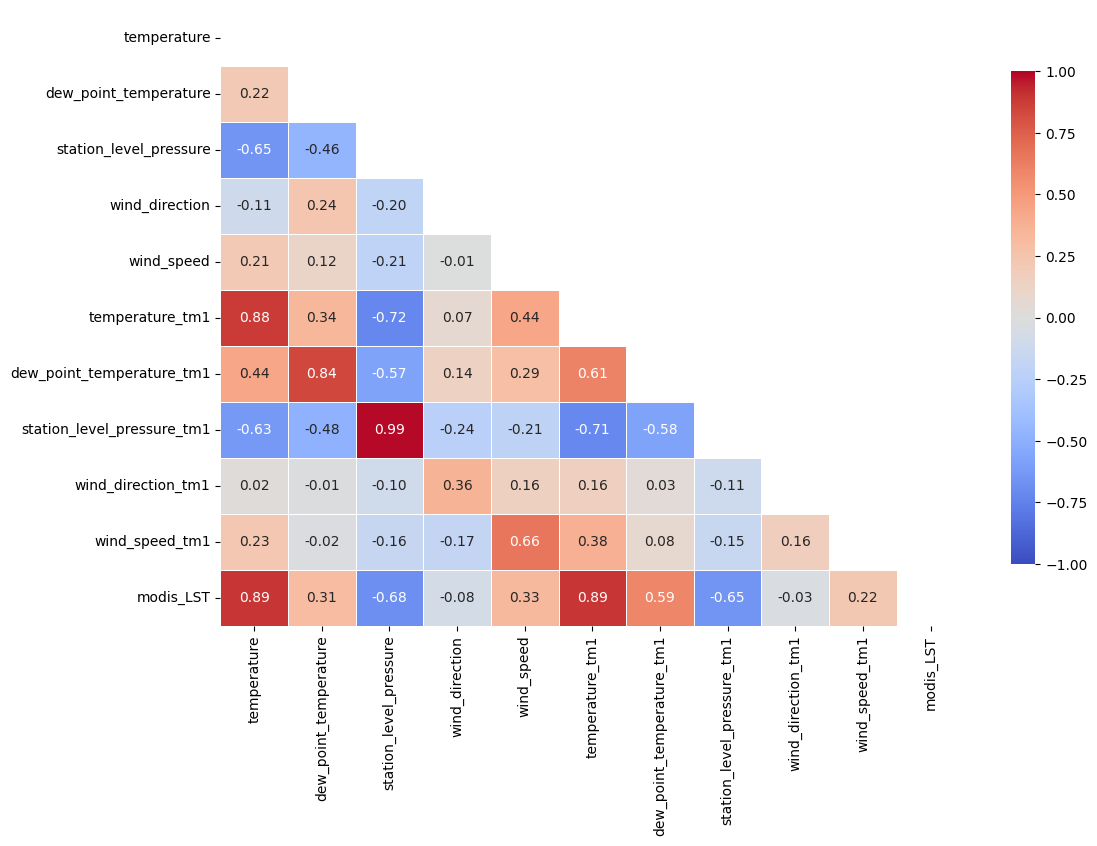

In [24]:
plt.figure(figsize=(12, 8))

corr_matrix = check.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,               
            annot=True,              
            cmap='coolwarm',         
            vmin=-1, vmax=1,         
            fmt='.2f',               
            linewidths=0.5,          
            cbar_kws={"shrink": .8}) 

exclude:
- station_level_pressure_tm1
- wind_direction
- wind_direction_tm1
- wind_speed_tm1 (tentative)

Experiment with removing with tm1 vals and compare performance.

In [25]:
### checking globally
global_constant_features = []

for col in df.columns:
    if df[col].nunique() == 1:
        global_constant_features.append(col) 

In [26]:
global_constant_features

['precipitation', 'precipitation_tm1']

In [27]:
for i in ['precipitation', 'wind_gust', 'precipitation_tm1', 'wind_gust_tm1']:
    print(f"Number of unique values in {i} is : {df[i].nunique()}\n")

Number of unique values in precipitation is : 1

Number of unique values in wind_gust is : 33

Number of unique values in precipitation_tm1 is : 1

Number of unique values in wind_gust_tm1 is : 36



In [28]:
for station in df['station_name'].unique():
    subset = df[df['station_name'] == station]
    print(f"##### {station} #####")
    for i in subset.columns:
        if i not in ['station_name', 'datetime', 'latitude', 'longitude', 'modis_time']:
            # if subset[i].nunique() == 1:
                print(f"Number of unique values in {i} is : {subset[i].nunique()}\n")

##### ATLANTIS INDUSTRIAL CAPE TOWN #####
Number of unique values in temperature is : 66

Number of unique values in dew_point_temperature is : 66

Number of unique values in station_level_pressure is : 67

Number of unique values in precipitation is : 1

Number of unique values in wind_direction is : 34

Number of unique values in wind_speed is : 15

Number of unique values in wind_gust is : 1

Number of unique values in modis_LST is : 83

Number of unique values in temperature_tm1 is : 70

Number of unique values in dew_point_temperature_tm1 is : 70

Number of unique values in station_level_pressure_tm1 is : 65

Number of unique values in precipitation_tm1 is : 1

Number of unique values in wind_direction_tm1 is : 27

Number of unique values in wind_speed_tm1 is : 11

Number of unique values in wind_gust_tm1 is : 1

##### CAPE TOWN / KIRSTENBOSCH #####
Number of unique values in temperature is : 69

Number of unique values in dew_point_temperature is : 55

Number of unique values in 

# Regression Modelling

In [29]:
df.head()

,station_name,datetime,latitude,longitude,temperature,dew_point_temperature,station_level_pressure,precipitation,wind_direction,wind_speed,wind_gust,modis_LST,modis_time,temperature_tm1,dew_point_temperature_tm1,station_level_pressure_tm1,precipitation_tm1,wind_direction_tm1,wind_speed_tm1,wind_gust_tm1
0,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-17 09:00:00,-33.6,18.483,28.0,18.0,997.5,0.0,160.0,9.8,0.0,310.64,2020-01-17 10:00:00,24.9,17.2,997.5,0.0,150.0,5.7,0.0
1,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-21 09:00:00,-33.6,18.483,24.7,14.6,999.3,0.0,210.0,3.6,0.0,311.90,2020-01-21 10:00:00,22.9,15.1,998.7,0.0,70.0,3.6,0.0
2,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-23 09:00:00,-33.6,18.483,28.2,10.2,997.6,0.0,90.0,5.1,0.0,312.12,2020-01-23 10:00:00,23.1,10.3,997.7,0.0,100.0,6.7,0.0
3,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-28 09:00:00,-33.6,18.483,22.5,13.7,1003.5,0.0,210.0,4.6,0.0,310.14,2020-01-28 10:00:00,18.6,12.8,1003.7,0.0,180.0,2.6,0.0
4,ATLANTIS INDUSTRIAL CAPE TOWN,2020-01-30 09:00:00,-33.6,18.483,33.4,10.4,998.3,0.0,70.0,1.5,0.0,317.80,2020-01-30 10:00:00,21.1,11.2,998.9,0.0,160.0,2.6,0.0


In [30]:
# X_vars = [
#     'temperature', 'dew_point_temperature', 'station_level_pressure', 'wind_speed', 'temperature_tm1',
#     'dew_point_temperature_tm1', 'wind_speed_tm1'
#           ]

X_vars = [
    'temperature', 'dew_point_temperature', 'station_level_pressure', 'wind_speed'
        ]

y_var = ['modis_LST']

In [31]:
def run_station_regression(df, station_name, X_vars, y_var, test_size=0.2, random_state=0, verbose=True):
    """
    Perform linear regression analysis for a specific weather station.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the weather station data
    station_name : str
        Name of the station to subset data for
    X_vars : list
        List of column names to use as features
    y_var : list or str
        Column name(s) to use as target variable
    test_size : float, default=0.2
        Proportion of data to use for testing
    random_state : int, default=42
        Random seed for reproducibility
    verbose : bool, default=True
        Whether to print metrics and create plots
        
    Returns:
    --------
    dict
        Dictionary containing regression results with the following keys:
        - 'model': The trained LinearRegression model
        - 'scaler': The fitted StandardScaler
        - 'r2': R-squared score on test data
        - 'rmse': Root Mean Squared Error on test data
        - 'mae': Mean Absolute Error on test data
        - 'y_test': Test target values
        - 'y_pred': Predicted values
    """
    # Subset data for the specific station
    station_df = df[df['station_name'] == station_name].copy()
    
    if len(station_df) == 0:
        raise ValueError(f"No data found for station '{station_name}'")
    
    # Handle y_var as string or list
    y_var_name = y_var[0] if isinstance(y_var, list) else y_var
    
    # Check for missing values
    missing_x = station_df[X_vars].isna().sum().sum()
    missing_y = station_df[y_var_name].isna().sum()
    
    if missing_x > 0 or missing_y > 0:
        if verbose:
            print(f"Warning: Found {missing_x} missing X values and {missing_y} missing y values")
        # Drop rows with missing values
        station_df = station_df.dropna(subset=X_vars + [y_var_name])
        
    # Split the data
    X = station_df[X_vars]
    y = station_df[y_var_name]

    data_points = len(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print results if verbose is True
    if verbose:
        print(f"\nRegression Results for Station: {station_name}")
        print("-" * 50)
        print(f"Number of samples: {len(station_df)}")
        print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
        print(f"R-squared: {r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        
        # Feature importance (based on standardized coefficients)
        importance = pd.DataFrame({
            'Feature': X_vars,
            'Coefficient': model.coef_
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        print("\nFeature Importance:")
        print(importance)
        
        # Create scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.6)
        
        # Add perfect prediction line
        min_val = min(min(y_test), min(y_pred))
        max_val = max(max(y_test), max(y_pred))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        plt.title(f'Actual vs Predicted LST for {station_name}')
        plt.xlabel('Actual LST')
        plt.ylabel('Predicted LST')
        plt.grid(True, alpha=0.3)
        
        # Add R² annotation
        plt.annotate(f'R² = {r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    # Return results as dictionary
    results = {
        'model': model,
        'scaler': scaler,
        'r2': r2,
        'rmse': rmse,
        'mae': mae,
        'n' : data_points
        # 'y_test': y_test,
        # 'y_pred': y_pred
    }
    
    return results

### Running regresion results

In [32]:
df['station_name'].unique()

array(['ATLANTIS INDUSTRIAL CAPE TOWN', 'CAPE TOWN / KIRSTENBOSCH',
       'CT-AWS', 'GEELBEK', 'JONKERSHOEK', 'LANGGEWENS', 'MALMESBURY',
       'MOLTENO RESERVIOR', 'PAARL', 'ROBBEN ISLAND',
       'SOUTH AFRICAN ASTRONOMICAL OBS', 'WELLINGTON', 'WORCESTER',
       'YSTERPLAAT', 'YSTERPLANT(SAAFB)'], dtype=object)


Regression Results for Station: ATLANTIS INDUSTRIAL CAPE TOWN
--------------------------------------------------
Number of samples: 87
Training samples: 69, Test samples: 18
R-squared: 0.7999
RMSE: 4.4035
MAE: 3.4012

Feature Importance:
                  Feature  Coefficient
0             temperature     6.293717
3              wind_speed     1.269848
2  station_level_pressure    -1.128875
1   dew_point_temperature    -0.093084


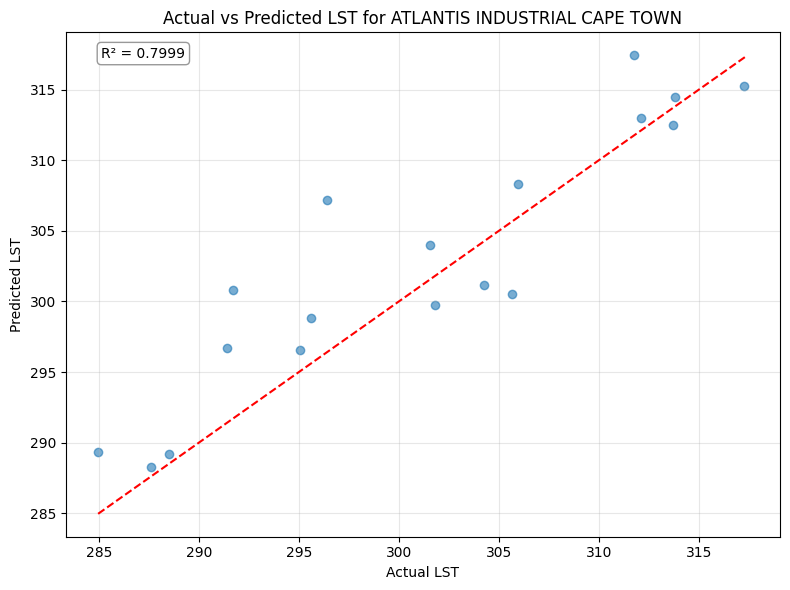

In [ ]:
# example usage
results = run_station_regression(df, "ATLANTIS INDUSTRIAL CAPE TOWN", X_vars, y_var)


In [34]:
# Run regressions for all stations and store results
df = df.drop(df[df['station_name'] == 'YSTERPLAAT'].index)
all_results = {}
for station in df['station_name'].unique():
    all_results[station] = run_station_regression(df, station, X_vars, y_var, test_size = 0.1 ,verbose=False)


In [37]:
all_results

{'ATLANTIS INDUSTRIAL CAPE TOWN': {'model': LinearRegression(),
  'scaler': StandardScaler(),
  'r2': 0.8531658712068558,
  'rmse': np.float64(3.767509549724122),
  'mae': 3.0223985577990473,
  'n': 87},
 'CAPE TOWN / KIRSTENBOSCH': {'model': LinearRegression(),
  'scaler': StandardScaler(),
  'r2': 0.6493424893732198,
  'rmse': np.float64(2.2102534187391427),
  'mae': 1.7708412926251853,
  'n': 78},
 'CT-AWS': {'model': LinearRegression(),
  'scaler': StandardScaler(),
  'r2': 0.8001209801605913,
  'rmse': np.float64(3.8497797500718334),
  'mae': 2.834063521402919,
  'n': 293},
 'GEELBEK': {'model': LinearRegression(),
  'scaler': StandardScaler(),
  'r2': 0.7206950028078438,
  'rmse': np.float64(3.330698397694007),
  'mae': 2.613797507674831,
  'n': 1059},
 'JONKERSHOEK': {'model': LinearRegression(),
  'scaler': StandardScaler(),
  'r2': 0.9190521307533958,
  'rmse': np.float64(2.0428248405333838),
  'mae': 1.5184221736452415,
  'n': 78},
 'LANGGEWENS': {'model': LinearRegression(),

In [38]:
# Get summary of R² and RMSE values for all stations
metrics = [(station, results['rmse'], results['r2'], results['n']) for station, results in all_results.items()]
metrics_df = pd.DataFrame(metrics, columns=['Station', 'RMSE (deg C)', 'R²', 'n_data_points']).sort_values('R²', ascending=False)
metrics_df.reset_index(drop=True, inplace=True)

In [39]:
metrics_df

,Station,RMSE (deg C),R²,n_data_points
0,JONKERSHOEK,2.042825,0.919052,78
1,SOUTH AFRICAN ASTRONOMICAL OBS,2.864066,0.891444,84
2,ATLANTIS INDUSTRIAL CAPE TOWN,3.767510,0.853166,87
3,LANGGEWENS,4.114289,0.850240,82
4,WORCESTER,3.881002,0.830996,1108
5,MOLTENO RESERVIOR,3.365552,0.825983,770
6,PAARL,3.843538,0.812581,770
7,CT-AWS,3.849780,0.800121,293
8,MALMESBURY,4.678689,0.755702,800
9,ROBBEN ISLAND,3.439763,0.724434,647


In [ ]:
def predict_station_lst(station_name, new_data, X_vars, all_results = all_results):
    
    # Check if station exists in results
    if station_name not in all_results:
        raise ValueError(f"No model found for station '{station_name}'")
    
    # Get the station-specific model and scaler
    station_results = all_results[station_name]
    model = station_results['model']
    scaler = station_results['scaler']
    
    missing_features = [var for var in X_vars if var not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing required features: {missing_features}")
    
    # Extract only the needed features in the correct order
    X_new = new_data[X_vars]
    
    # Applying the same standardization as used during training
    X_new_scaled = scaler.transform(X_new)
    
    # Make predictions
    predictions = model.predict(X_new_scaled)
    
    
    return predictions

___

#### Converting station data to LST using coefficients:

In [47]:
import pathlib
import pprint

import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import lst_filler as lf

In [48]:
config = lf.load_yaml_config('../data/lst_config.yaml')


In [49]:
# load station data:
station_data = lf.data.stations.read_stations(**config.stations, progressbar=True)


[########################################] | 100% Completed | 409.76 ms


In [50]:
station_data.shape

(341181, 15)

In [51]:
station_data.reset_index(inplace=True)

In [52]:
station_data['station_name'].nunique()

21

In [53]:
station_data[station_data['station_name'].isin(all_results.keys())]

,datetime,station_name,latitude,longitude,temperature,dew_point_temperature,station_level_pressure,precipitation,wind_direction,wind_speed,wind_gust,temperature_quality_code,dew_point_temperature_quality_code,station_level_pressure_quality_code,wind_direction_quality_code,wind_speed_quality_code,wind_gust_quality_code
2,2016-01-01 00:00:00,GEELBEK,-33.1830,18.1170,14.8,14.1,1013.7,0.0,230.0,1.5,0.0,1,1,1,1,1,0.0
4,2016-01-01 00:00:00,MALMESBURY,-33.4670,18.7170,20.2,18.0,1001.0,0.0,240.0,1.0,0.0,1,1,NE,1,1,0.0
5,2016-01-01 00:00:00,ROBBEN ISLAND,-33.8000,18.3670,18.0,16.1,1012.8,0.0,310.0,2.1,0.0,1,1,1,1,1,0.0
7,2016-01-01 00:00:00,WORCESTER,-33.6170,19.4670,23.6,19.2,991.0,0.0,100.0,1.0,0.0,1.0,1.0,1,1,1,0.0
10,2016-01-01 03:00:00,GEELBEK,-33.1830,18.1170,15.4,14.9,1013.2,0.0,250.0,1.0,0.0,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341175,2024-12-05 21:00:00,MALMESBURY,-33.4667,18.7167,16.7,12.3,1004.0,0.0,360.0,1.0,0.0,1,1,1,1.0,1,0.0
341176,2024-12-05 21:00:00,MOLTENO RESERVIOR,-33.9333,18.4167,17.1,13.6,1004.5,0.0,320.0,2.6,5.1,1.0,1.0,1,1.0,1,1.0
341177,2024-12-05 21:00:00,PAARL,-33.7167,18.9667,15.9,11.5,1004.3,0.0,330.0,1.0,0.0,1,1,1,1.0,1,0.0
341178,2024-12-05 21:00:00,ROBBEN ISLAND,-33.8000,18.3667,15.3,13.3,1015.5,0.0,320.0,3.1,0.0,1,1,1,1.0,1,0.0


In [54]:
# subsetting station_data:
subset_station = station_data[station_data['station_name'].isin(all_results.keys())]
subset_station.reset_index(drop=True, inplace=True)

In [55]:
subset_station.shape

(208686, 17)

In [58]:
from tqdm.auto import tqdm
import warnings

warnings.filterwarnings('ignore')

c:\Users\Benedict\python_folder\AIMS_Masters\lst_filler\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
subset_station['LST'] = np.nan

for idx, row in tqdm(subset_station.iterrows(), total=len(subset_station)):
    # Convert the row to a DataFrame (needed for prediction)
    row_df = pd.DataFrame([row[X_vars]])
    
    # Get the station name from the current row
    station_name = row['station_name']  # assuming there's a station_name column
    
    # Make prediction
    prediction = predict_station_lst(
        station_name,
        row_df,  
        X_vars
    )
    
    subset_station.at[idx, 'LST'] = prediction[0]

100%|██████████| 208686/208686 [03:47<00:00, 918.23it/s]


In [60]:
subset_station.head()

,datetime,station_name,latitude,longitude,temperature,dew_point_temperature,station_level_pressure,precipitation,wind_direction,wind_speed,wind_gust,temperature_quality_code,dew_point_temperature_quality_code,station_level_pressure_quality_code,wind_direction_quality_code,wind_speed_quality_code,wind_gust_quality_code,LST
0,2016-01-01 00:00:00,GEELBEK,-33.183,18.117,14.8,14.1,1013.7,0.0,230.0,1.5,0.0,1,1,1,1,1,0.0,290.004190
1,2016-01-01 00:00:00,MALMESBURY,-33.467,18.717,20.2,18.0,1001.0,0.0,240.0,1.0,0.0,1,1,NE,1,1,0.0,300.202415
2,2016-01-01 00:00:00,ROBBEN ISLAND,-33.800,18.367,18.0,16.1,1012.8,0.0,310.0,2.1,0.0,1,1,1,1,1,0.0,295.827688
3,2016-01-01 00:00:00,WORCESTER,-33.617,19.467,23.6,19.2,991.0,0.0,100.0,1.0,0.0,1.0,1.0,1,1,1,0.0,304.521368
4,2016-01-01 03:00:00,GEELBEK,-33.183,18.117,15.4,14.9,1013.2,0.0,250.0,1.0,0.0,1,1,1,1,1,0.0,290.820939


In [61]:
subset_station.to_parquet("../data/regression_station_data.parquet")